# COMPSCI 371D Homework 11

# Sample Solution

## Homework Submission Workflow

When you submit your work, follow the instructions on the [submission workflow page](https://www.cs.duke.edu/courses/fall19/compsci371d/homework/workflow.html) for full credit, but see the changes mentioned below.

<span style="color:red">**Important changes to homework preparation workflow:** _**This assignment is different from the others in that you are required to run it on the Google Colaboratory, a cloud service that Google makes available for reseach in machine learning.**_ </span>

This is necessary because one of the problems requires you to train a deep network on hardware that is faster than what is typically available on a standard laptop or desktop, including a high-end GPU. Even if you do have a high-end GPU, please run your notebook on the Colaboratory, so we can grade your work consistently. 

_**To work on this assignment, go to the [Colaboratory](https://colab.research.google.com) and upload the template notebook for this assignment through the `File` menu at the top of the Colaboratory page. Then work on the assignment.**_

_**When you are done, download the notebook (after making sure that all the outputs from running the code show up properly), and proceed as usual to turn that notebook into a PDF file for submission.**_

#### Programming Notes

+ Before you run any of your code cells, go to the `Runtime->Change runtime type` menu and make sure that the hardware acceleration is set to `GPU`. This is very important: With acceleration set to `None`, your code would run on the CPU and take forever.
+ The Colaboratory is a cloud service. If a notebook sits idle for a long time, it automatically disconnects from its execution kernel, and you need to rerun all the cells.
+ Once you are done with the assignment, the safest thing to do is to do `Runtime->Reset all runtimes`, and `Runtime->Run all` to run all cells. Check all your output after that.
+ Training depends on random initialization of the network parameters. Because of this, your results may vary relative to the sample solution, even if your code is no different. Results may also vary from run to run.

## Part 1: Exam-Style Questions, Set 1

The small neural net in the figure below uses the ReLU as the nonlinearity at the output of each neuron. The values specified in the hollow circles are biases, and the values along the edges are gains. Weigths number 1, 2, 3 refer to the first neuron, 4, 5,6 to the second, 7, 8, 9 to the third.

![a simple neural network](https://www2.cs.duke.edu/courses/spring19/compsci527/homework/5/netSimple.png)

### Problem 1.1

Are all the layers in the net above fully connected?

### Answer

Yes.

### Problem 1.2

What is the output $y$ from the net above when the input is as follows?

$$
x_1 = 0 \;\;\; \text{and}\;\;\; x_2 = 3
$$

### Answer

$$
y = 4
$$

### Problem 1.3

What is the gradient $\mathbf{g}$ of the output $y$ of the network above with respect to the weight vector

$$
\mathbf{w} = [w_1,\ w_2,\ w_3,\ w_4,\ w_5,\ w_6,\ w_7,\ w_8,\ w_9]^T
$$

when the input has the values given in the previous problem? Just give the result if you are confident of your answer.

**Hint:** Compute all activations in a forward pass throught the network. Then let $g_k = \partial y/\partial w_k$ for notational simplicity, and compute these gradients backwards: $g_7, g_8, g_9$, then $g_1, g_2, g_3$, then $g_4, g_5, g_6$. Finally, collect all the $g_k$ into a vector $\mathbf{g}$ in order.

### Answer

Activations can be computed in a forward pass (from the previous problem) to be

$$
a_1 = 0 \;\;\;,\;\;\; a_2 = 3 \;\;\;,\;\;\; y = a_3 = 4\;.
$$

With these values, we have

\begin{eqnarray*}
y &=& w_7 a_1 + w_8 a_2 + w_9 \\
a_1 &=& 0 \\
a_2 &=& w_4 x_1 + w_5 x_2 + w_6
\end{eqnarray*}

Letting $g_k = \partial y/\partial w_k$, a backward pass yields the entries of $\mathbf{g}$:

$$
\begin{array}{lclcl}
g_7 = a_1 = 0 &,& g_8 = a_2 = 3 &,& g_9 = 1 \\
g_1 = 0 &,& g_2 = 0  &,& g_3 =  0 \\
g_4 = w_8 x_1 = 0 &,& g_5 = w_8 x_2 = 3 &,& g_6 = w_8 = 1 
\end{array}
$$

so that

$$
\mathbf{g} = [0, 0, 0, 0, 3, 1, 0, 3, 1] ^T\;.
$$



## Part 2: Exam-Style Questions, Set 2




Let $\mathbf{p} = f(\mathbf{x})$ be the output of the final, soft-max layer of some neural network classifier with $K$ layers when the network's input is $\mathbf{x}$. The classifier's output is then

$$
\hat{y} = \arg\max \mathbf{p}\;.
$$

If $y_n$ is the true label corresponding to training input $\mathbf{x}_n$, the loss is $\ell_n = \ell(y_n, f(\mathbf{x}_n))$ for some loss function $\ell(y, \mathbf{p})$ appropriate for the task.

We saw in class that if $\mathbf{x}^{(k)}$ is the output from layer $k$ and $\mathbf{w}^{(k)}$ is a vector with all the parameters in layer $k$, then back-propagation computes the partial derivatives by the following recursion,  where $\mathbf{x}^{(0)} = \mathbf{x}$ is the input to the network and $\mathbf{x}^{(K)} = \mathbf{p}$:

\begin{eqnarray*}
\frac{\partial \ell_n}{\partial \mathbf{w}^{(k)}} &=& \frac{\partial \ell_n}{\partial \mathbf{x}^{(k)}} \frac{\partial \mathbf{x}^{(k)}}{\partial \mathbf{w}^{(k)}}
\;\;\;\text{for}\;\;\; k = K,\ldots, 1 \\
\frac{\partial \ell_n}{\partial \mathbf{x}^{(k-1)}} &=& \frac{\partial \ell_n}{\partial \mathbf{x}^{(k)}} \frac{\partial \mathbf{x}^{(k)}}{\partial \mathbf{x}^{(k-1)}}
\;\;\;\text{for}\;\;\; k = K,\ldots, 2\\
\frac{\partial \ell_n}{\partial \mathbf{x}^{(K)}} &=& \frac{\partial \ell}{\partial \mathbf{p}}
\end{eqnarray*}

The derivatives above are computed for the $n$-th training sample $(\mathbf{x}_n, y_n)$ and for the values of $\mathbf{w}^{(k)}$ that are current at any given point during training.

### Problem 2.1

Suppose that the network has only fully-connected layers (with ReLU nonlinearities) before the soft-max. Refer in detail to the equations given above to explain clearly why training would not work if the parameter vector $\mathbf{w} = [\mathbf{w}^{(1)},\ldots, \mathbf{w}^{(K)}]^T$ is initialized with zeros for training.

### Answer

If $V^{(k)}$ is the matrix of gains in layer $k$, we have

$$
\frac{\partial \mathbf{x}^{(k)}}{\partial \mathbf{x}^{(k-1)}} = V^{(k)}
$$

and if all the weights are initialized to zero, this Jacobian is zero. Therefore, $\frac{\partial \ell_n}{\partial \mathbf{x}^{(k-1)}}$ is also zero for $k = 2,\ldots, K$ (second equation above), and therefore, from the first equation, $\frac{\partial \ell_n}{\partial \mathbf{w}^{(k)}} = 0$ for all $k$. Thus, the gradient is always zero, and no progress occurs during training.

### Problem 2.2

A neural net classifier with only fully-connected layers (with ReLU nonlinearities) and a soft-max layer at its output has parameter vector $\mathbf{w}$, and the network  implements the function $f(\mathbf{x}, \mathbf{w})$ for any network input $\mathbf{x}$. Is $\mathbf{w} = \mathbf{0}$ a stationary point for the function $\phi(\mathbf{w}) = f(\mathbf{x}, \mathbf{w})$ when $\mathbf{x}$ is fixed? Justify your answer.

### Answer

Yes, $\mathbf{w} = \mathbf{0}$ is a stationary point for $\phi(\mathbf{w})$, because we saw in the previous problem that $\phi$ has zero gradient there.

### Problem 2.3

Stochastic gradient descent with momentum is used to train a certain neural network with $m$ parameters. Just before iteration $t$ of training is performed, the parameter vector has value $\mathbf{w}_t$, and the velocity (or step) is $\mathbf{v}_t = \mathbf{a}$, where $\mathbf{a}$ is some nonzero vector in $\mathbb{R}^m$ (refer to the class notes for notation). The momentum coefficient is kept constant at $\mu = 0.9$ throughout training. If the risk function has a saddle point at $\mathbf{w}_t$, what is the step $\mathbf{v}_{t+1}$ at iteration $t$, in terms of $\mathbf{a}$ and any relevant parameters?

### Answer

The step at iteration $t$ is $\mathbf{v}_{t+1} = 0.9\, \mathbf{a}$.

### Problem 2.4

In the situation described in Problem 2.3, will the training algorithm always eventually converge back towards $\mathbf{w}_t$? Explain your answer briefly and clearly.

### Answer

No, training will not necessarily converge towards $\mathbf{w}_t$. The step $\mathbf{v}_{t+1}$ moves the algorithm away from the saddle point. The new negative gradient at $\mathbf{w}_{t+1}$ may point away from $\mathbf{w}_t$, and it is then possible that the algorithm eventually escapes the saddle point toward parameter vectrors with lower risk, never to return to $\mathbf{w}_t$.

## Part 3: Experiment with CIFAR-10

The code in this part is somewhat modified from [a blog on Keras](https://adventuresinmachinelearning.com/keras-eager-and-tensorflow-2-0-a-new-tf-paradigm/). It downloads the CIFAR-10 dataset, a set of 60000 labeled images grouped in 10 categories, which it splits into training and validation sets. The code also prints the sizes of these two sets.

For both training and validation data, the image pixel values are normalized to [0, 1] by dividing them by 255, and the labels are converted to one-hot encoding. Training images are also flipped left-to-right at random, to provide a simple form of data augmentation. Images are provided in random order to the training algorithm in batches of 32 samples.

The code then defines a function `SimpleNetwork` that returns a simple convolutional neural network (the `model`), and a function `train` that reinitializes the model and trains it for the specified number of epochs (an epoch is a full run through the data set) and descent steps per epoch, using the specified optimizer. The default optimizer is ADAM, a variant of stochastic gradient descent that selects the descent step adaptively. We will use this optimizer in this Part.

Finally, the code instantiates the model.

_**Important:**_ Make sure you select Python 3 through the `Runtime->Change runtime type` menu at the top of the notebook. Also set the hardware acceleration to `GPU` in that same menu.

In [1]:
% tensorflow_version 2.x

import tensorflow as tf
from tensorflow import keras
import datetime as dt

TensorFlow 2.x selected.


In [2]:
(x_train, y_train), (x_validate, y_validate) = keras.datasets.cifar10.load_data()

train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(32).shuffle(10000)
train_dataset = train_dataset.map(lambda x, y: (tf.math.divide(tf.cast(x, tf.float32), 255.0),
                                                tf.reshape(tf.one_hot(y, 10), (-1, 10))))
train_dataset = train_dataset.map(lambda x, y: (tf.image.random_flip_left_right(x), y))
train_dataset = train_dataset.repeat()

170500096/170498071 [==============================] - 6s 0us/step


In [0]:
valid_dataset = tf.data.Dataset.from_tensor_slices((x_validate, y_validate)).batch(len(y_validate))
valid_dataset = valid_dataset.map(lambda x, y: (tf.math.divide(tf.cast(x, tf.float32), 255.0),
                                                tf.reshape(tf.one_hot(y, 10), (-1, 10))))

In [4]:
print('{} training and {} validation samples'.format(len(y_train), len(y_validate)))

50000 training and 10000 validation samples


In [0]:
class SimpleNetwork(keras.Model):
    def __init__(self):
        super(SimpleNetwork, self).__init__(name='cifar_cnn')
        self.conv1 = keras.layers.Conv2D(64, 5,
                                         padding='same',
                                         activation=tf.nn.relu,
                                         kernel_initializer=tf.initializers.VarianceScaling,
                                         kernel_regularizer=keras.regularizers.l2(l=0.001))
        self.max_pool2d = keras.layers.MaxPooling2D((3, 3), (2, 2), padding='same')
        self.max_norm = keras.layers.BatchNormalization()
        self.conv2 = keras.layers.Conv2D(64, 5,
                                         padding='same',
                                         activation=tf.nn.relu,
                                         kernel_initializer=tf.initializers.VarianceScaling,
                                         kernel_regularizer=keras.regularizers.l2(l=0.001))
        self.flatten = keras.layers.Flatten()
        self.fc1 = keras.layers.Dense(750, activation=tf.nn.relu,
                                      kernel_initializer=tf.initializers.VarianceScaling,
                                      kernel_regularizer=keras.regularizers.l2(l=0.001))
        self.dropout = keras.layers.Dropout(0.5)
        self.fc2 = keras.layers.Dense(10)
        self.softmax = keras.layers.Softmax()

    def call(self, x):
        x = self.max_pool2d(self.conv1(x))
        x = self.max_norm(x)
        x = self.max_pool2d(self.conv2(x))
        x = self.max_norm(x)
        x = self.flatten(x)
        x = self.dropout(self.fc1(x))
        x = self.fc2(x)
        return self.softmax(x)

In [0]:
class ProgressReport(tf.keras.callbacks.Callback):

  def __init__(self, epochs):
    print('{} epochs:'.format(epochs), end=' ')

  def on_epoch_begin(self, epoch, logs=None):
    pass

  def on_epoch_end(self, epoch, logs=None):
    print(epoch, end=' ')
    if epoch > 0 and epoch % 20 == 0:
      print()

In [0]:
def train(model, epochs=100, steps_per_epoch=1000, optimizer=tf.optimizers.Adam()):
  now = dt.datetime.now().strftime("%Y-%m-%d-%H-%M-%S")
  progress = ProgressReport(epochs)
  callbacks = [
    keras.callbacks.History(),
    progress
  ]

  model.compile(optimizer=optimizer,
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  history = model.fit(train_dataset, epochs=epochs, steps_per_epoch=steps_per_epoch,
                      validation_data=valid_dataset, validation_steps=1,
                      callbacks=callbacks, verbose=0)
  return history

model = SimpleNetwork()

### Problem 3.1

Train the `model` with the call

    history = train(model)

Training will take several minutes.

When done, use the function `plot_performance` below with argument `history` to display plots of training and validation risk and accuracy as a function of training epoch.

In [0]:
from matplotlib import pyplot as plt
%matplotlib inline

def plot_performance(h):
  plt.figure(figsize=(15, 5))
  for plot, (key, title) in enumerate((('loss', 'risk'), ('accuracy', 'accuracy'))):
    plt.subplot(1, 2, plot + 1)
    plt.plot(h.history[key], label='training')
    plt.plot(h.history['val_' + key], label='validation')
    plt.xticks(range(0, len(h.history[key]), 10))
    plt.xlabel('epoch')
    plt.ylabel(title)
    plt.legend()
  plt.show()

Based on these plots, do you think that it will be beneficial to train the classifier longer? Explain briefly.

**Note:** This is a somewhat subjective judgement call, and conclusions may vary. Make sure you explain your reasoning.

### Answer

In [9]:
history = train(model)

100 epochs: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 
21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 
41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 
61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 
81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 

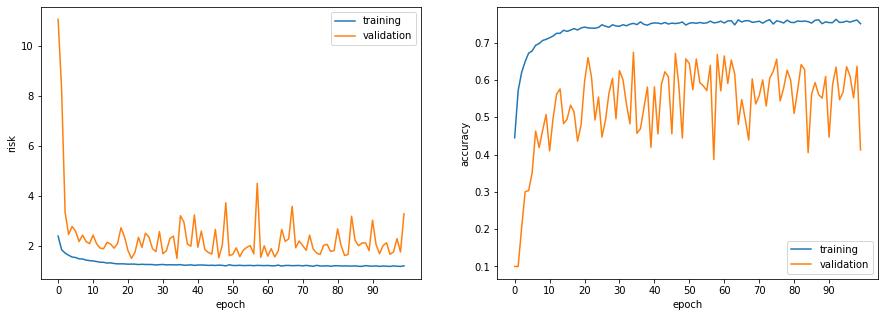

In [10]:
  plot_performance(history)

Training longer may still be somewhat beneficial. The training accuracy has more or less leveled. However, validation accuracy seems to be still on the rise, and validation loss is oscillating, but has not clearly started to rise. There is still room for a better fit without making overfit worse.

**Note:** As mentioned, this is a somewhat subjective judgement call, given the uncertainty in the validation measures. If you reached the opposite conclusion that's OK, as long as you motivated it properly.

### Problem 3.2

Suggest at least three different ways to improve the performance of the classifier defined in this Part. This could include using the data differently, modifying the network, changing how the network is trained, using multiple networks, ...

For each way, explain why that would help. This is an open-ended question, and answers may vary. Do _not_ implement your suggestions, and do _not_ refer to techniques we have not covered in class.

If you suggest more than three ways, we will grade you for the three best ones. However, we _will_ deduct points for patently wrong statements in any of your suggestions.

### Answer

+ Use all the images for training, and check validation performance by cross-validation, rather than by setting 10000 images aside for this purpose as done above. This will increase the size of the training set, somewhat improving generalization.
+ Use additional data augmentation methods in addition to flipping the image left-to-right. For instance, take random crops, rotate the images, change their colors. Data augmentation results in the training algorithm effectively seeing more data, and the ratio of training set size to number of parameters improves.
+ Add more layers to the network, to give it more expressive power. AlexNet works better on harder problems, and has more layers. This may require adding data to the training set.
+ Train the network multiple times with different initializers, and pick the network that yields the highest validation accuracy. Training converges to local minima of the risk function, and different minima may perform differently.
+ Train several networks with different initializers and/or on different subsets of the data, and combine their predictions through a majority vote. This combination, which is obviouly expensive, may smooth out overfitting errors and lead to better generalization.



### Problem 3.3 (Exam Sytle)

The data set in the experiment above is all the data that is available, and the experiment is to be used in a conference paper that extols the virtues of the proposed neural network architecture.

The data set was split into 50,000 training and 10,000 validation images. What is the most important reason why this split is not ideal?

### Answer

No data has been set aside for testing. Validation performance is not a good way to determine generalization performance, because validation data is used during training, even if it is not part of the training set itself.

### Problem 3.4 (Exam Style)

Is it always advisable to use the model obtained at the end of the last epoch of training as the classifier for deployment? Explain briefly.

### Answer

No. Assuming that the validation accuracy is a resonable estimate of the true accuracy, it may be better to use the model obtained after the epoch that gave the highest validation accuracy. This epoch may or may not be the last one.